# Bayesian Network and Social Media (FAIKR3 Project)

... Explain what we are going to do here ...

https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media

In [33]:
# Imports
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

## Data Exploration

In [34]:
# Carica il tuo dataset in un DataFrame di pandas
# Supponiamo che il tuo DataFrame sia chiamato 'social_data'
df = pd.read_csv('./dummy_data.csv')

In [75]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,stipendio_cluster,cluster
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,0,0
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,2,2
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,1,1
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,2,2
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False,0,0
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False,2,2
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True,0,0
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False,1,1


In [74]:
df['profession'].values

array(['Software Engineer', 'Student', 'Marketer Manager', 'Student',
       'Software Engineer', 'Marketer Manager', 'Student',
       'Marketer Manager', 'Marketer Manager', 'Marketer Manager',
       'Student', 'Marketer Manager', 'Student', 'Software Engineer',
       'Student', 'Software Engineer', 'Student', 'Marketer Manager',
       'Student', 'Marketer Manager', 'Software Engineer', 'Student',
       'Marketer Manager', 'Software Engineer', 'Software Engineer',
       'Student', 'Software Engineer', 'Marketer Manager',
       'Software Engineer', 'Software Engineer', 'Marketer Manager',
       'Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Marketer Manager', 'Software Engineer',
       'Marketer Manager', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Marketer Manager',
       'Marketer Manager', 'Marketer Manager', 'Student',
       'Software Engineer', 'Software Engineer', 'Marketer Man

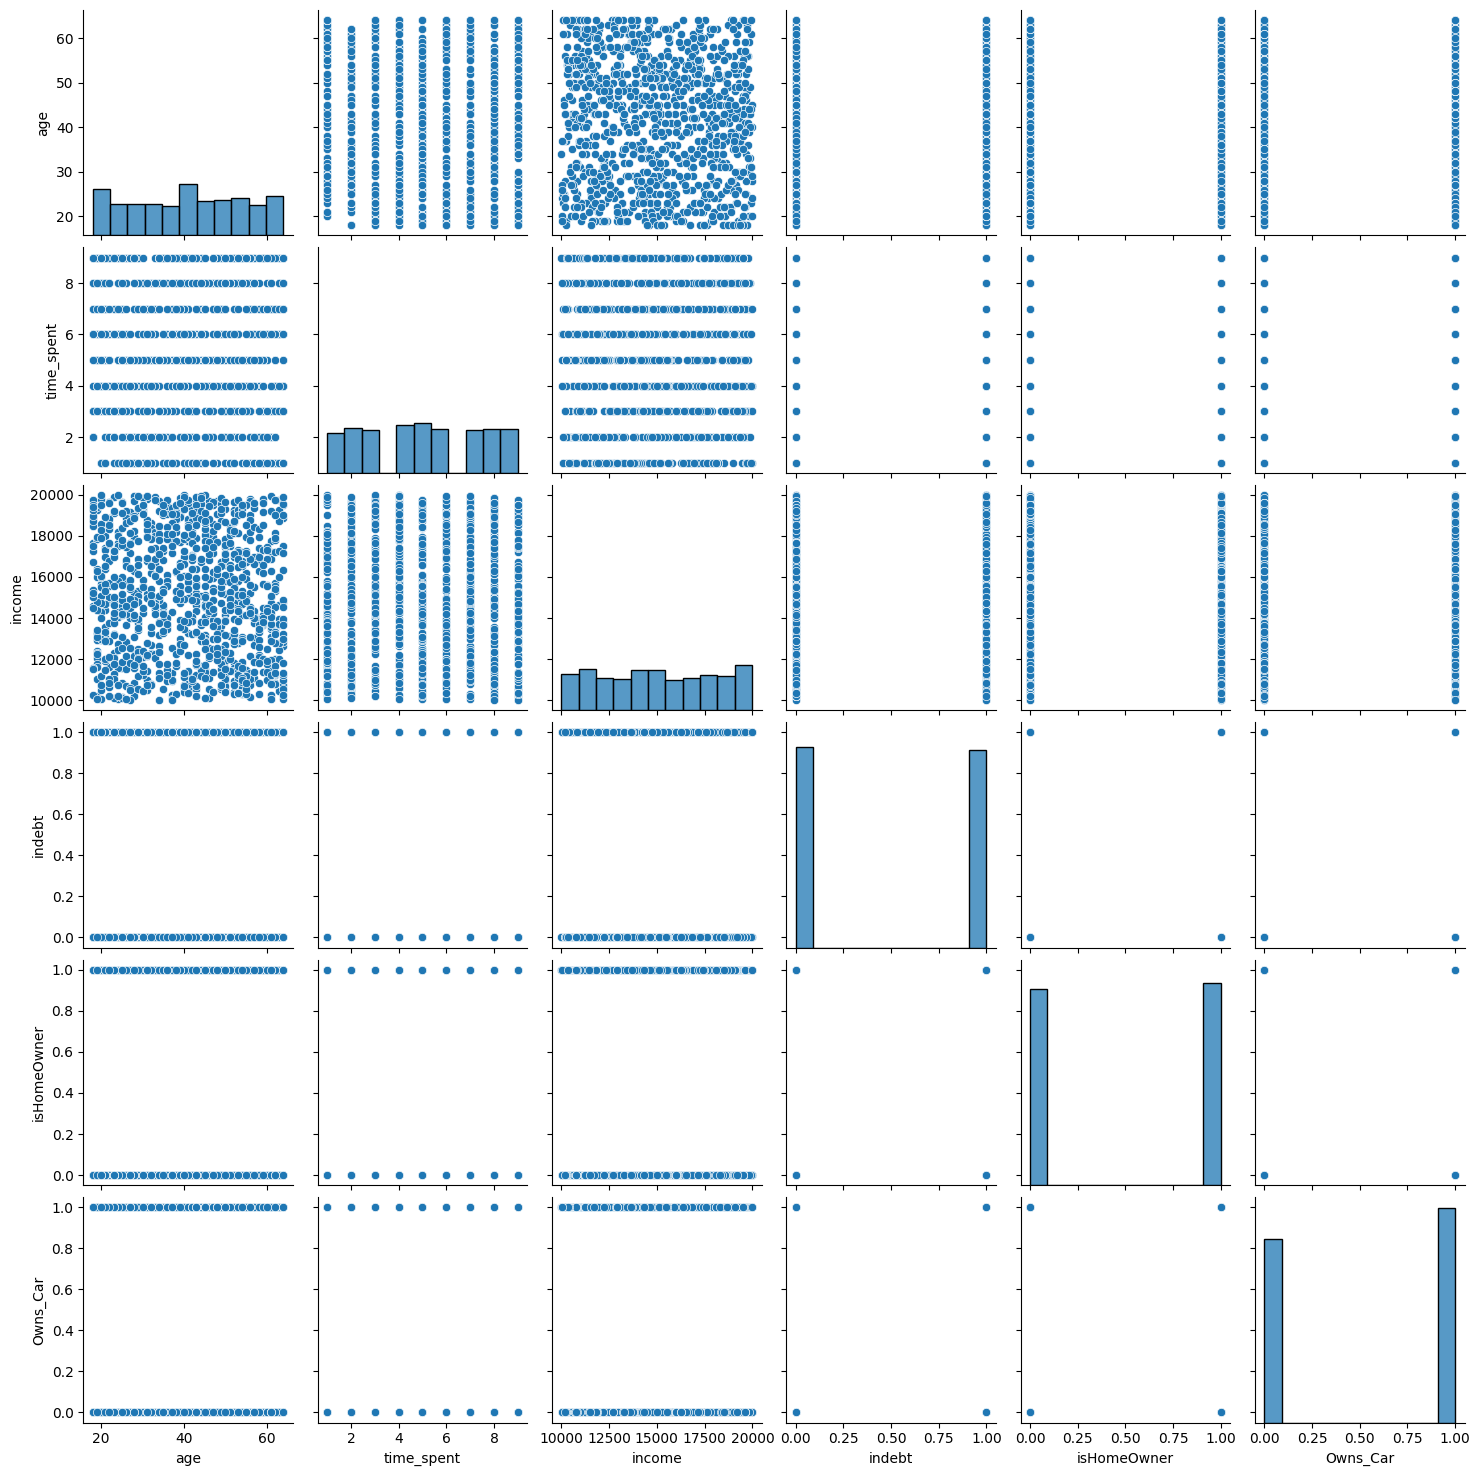

In [40]:
import seaborn as sns
sns.pairplot(df)

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


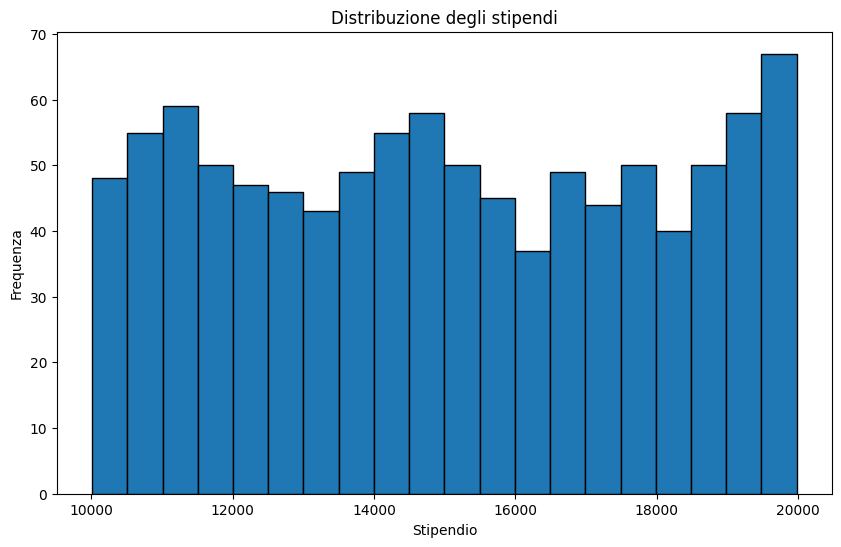

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df['income'], bins=20, edgecolor='black')
plt.title('Distribuzione degli stipendi')
plt.xlabel('Stipendio')
plt.ylabel('Frequenza')
plt.show()

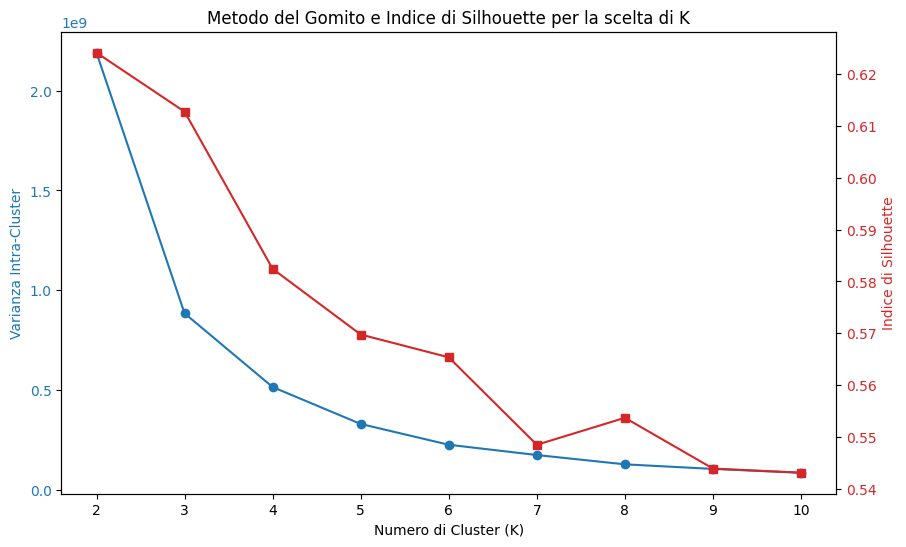

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sostituisci 'stipendio' con il nome reale della colonna
X = df[['income']]

# Lista per memorizzare i valori di silhouette
silhouette_scores = []

# Lista per memorizzare le varianze intra-cluster
inertia_values = []

# Prova con un range di valori k
for k in range(2, 11):  # Parti da 2 perché l'indice di silhouette richiede almeno 2 cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calcola l'indice di silhouette
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calcola la varianza intra-cluster
    inertia_values.append(kmeans.inertia_)

# Visualizza il grafico con il metodo del gomito e l'indice di silhouette
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Numero di Cluster (K)')
ax1.set_ylabel('Varianza Intra-Cluster', color='tab:blue')
ax1.plot(range(2, 11), inertia_values, marker='o', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Indice di Silhouette', color='tab:red')
ax2.plot(range(2, 11), silhouette_scores, marker='s', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Metodo del Gomito e Indice di Silhouette per la scelta di K')
plt.show()


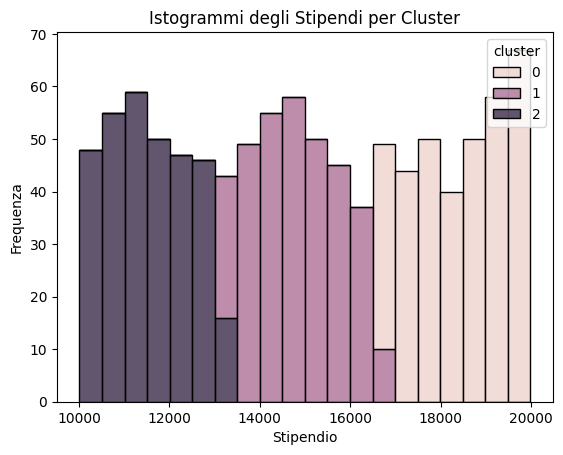

In [70]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sostituisci 'stipendio' con il nome reale della colonna
X = df[['income']]

# Numero di cluster desiderati
num_clusters = 3

# Esegui KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Sostituisci 'cluster' con il nome reale della colonna contenente le etichette dei cluster
# e 'stipendio' con il nome reale della colonna degli stipendi
sns.histplot(data=df, x='income', hue='cluster', multiple='stack', bins=20)
plt.title('Istogrammi degli Stipendi per Cluster')
plt.xlabel('Stipendio')
plt.ylabel('Frequenza')
plt.show()

I will use 3 clusters:
1. income <= 13.000 -> cluster 0
2. income > 13.000 , income < 16.500 -> cluster 1
3. income >= 16.500 -> cluster 2

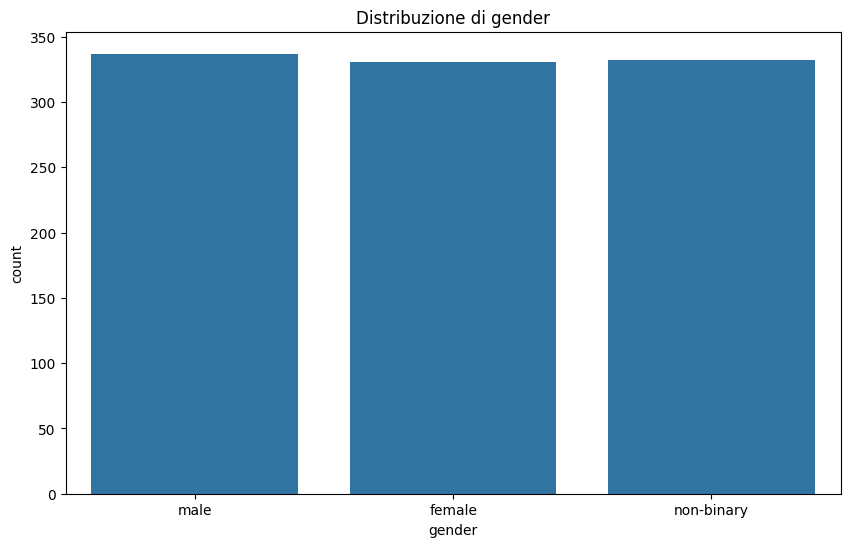

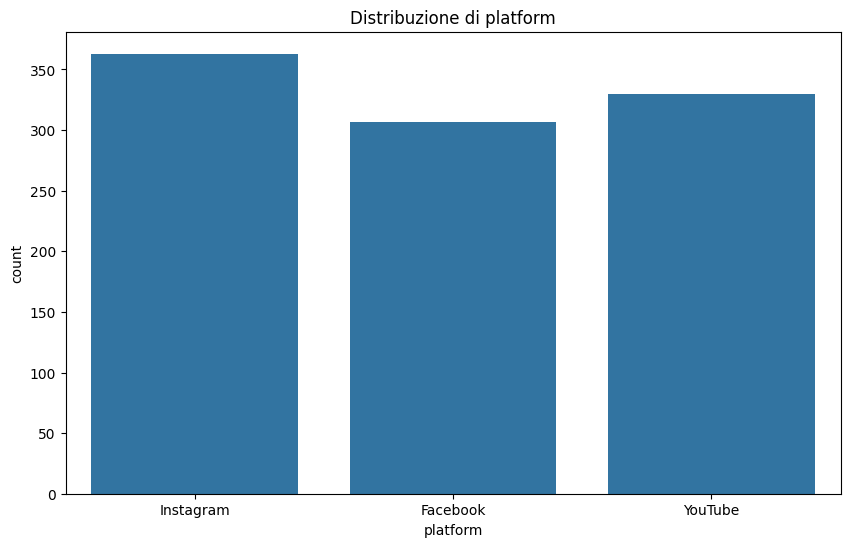

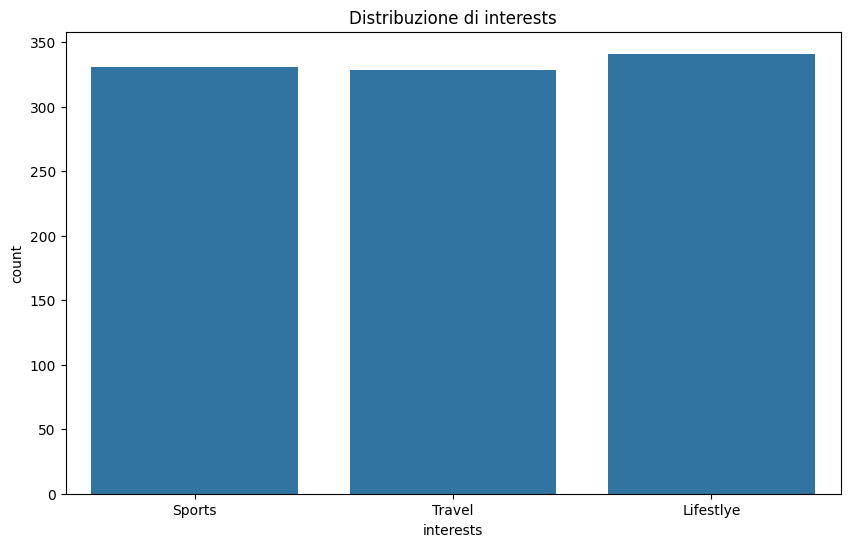

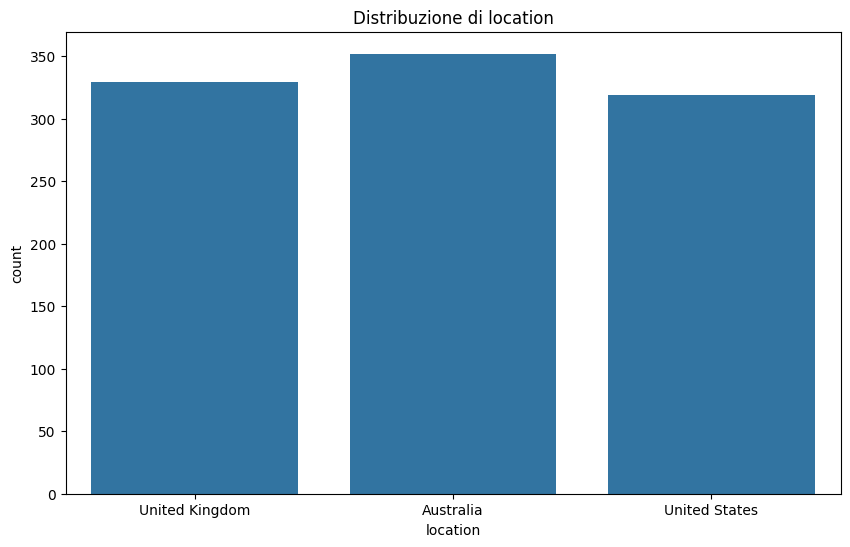

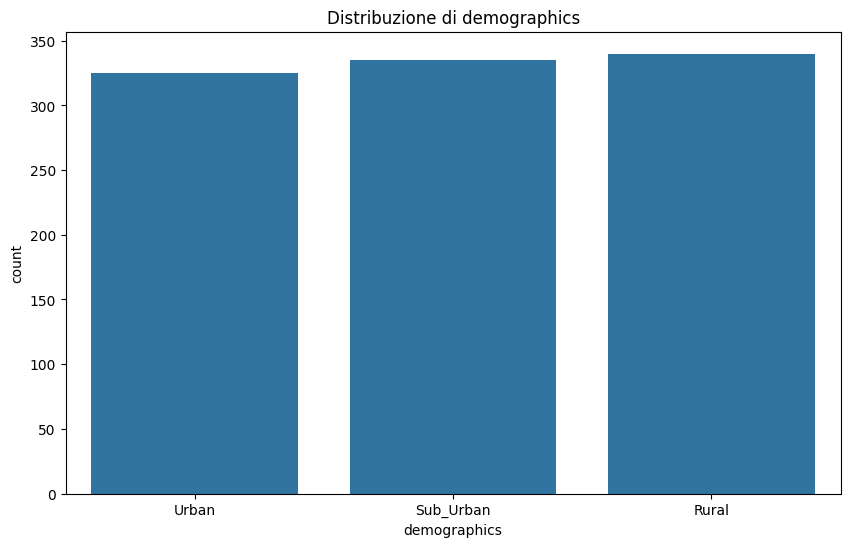

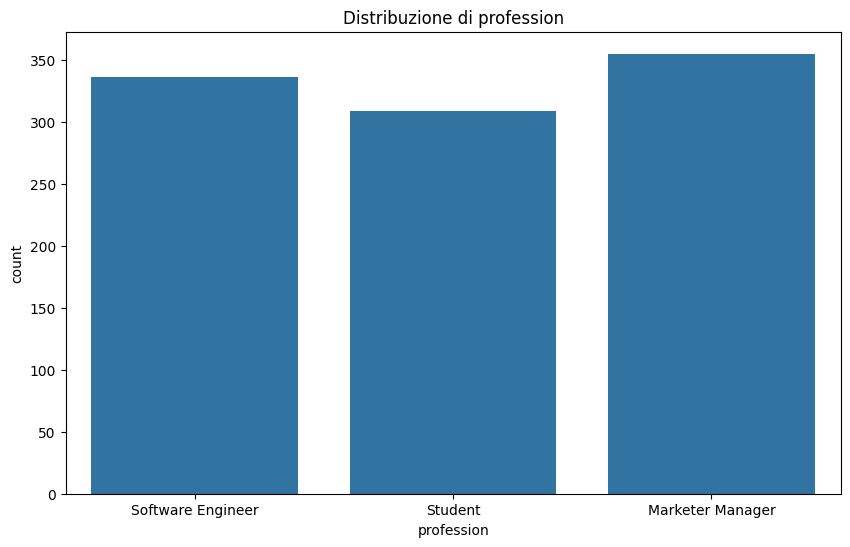

In [43]:
for colonna in df.columns:
    if df[colonna].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=colonna, data=df)
        plt.title(f'Distribuzione di {colonna}')
        plt.show()

### Description
The description for each column is as follows:

1. **age**: The age of the user.
2. **gender**: The gender identity of the user (Male, Female, Non-binary).
3. **demographics**: The type of area the user resides in (Urban, Suburban, Rural).
4. **interests**: The user's primary area of interest or hobby.
5. **device_type**: The type of device used by the user (Mobile).
6. **location**: The country of residence for the user.
7. **platform**: The social media platform where the user spends time.
8. **profession**: The user's occupation or professional status.
9. **income**: The yearly income of the user.
10. **indebt**: Indicates whether the user is in debt (True or False).
11. **homeowner**: Indicates whether the user owns a home (True or False).
12. **owns_cars**: Indicates whether the user owns cars (True or False).

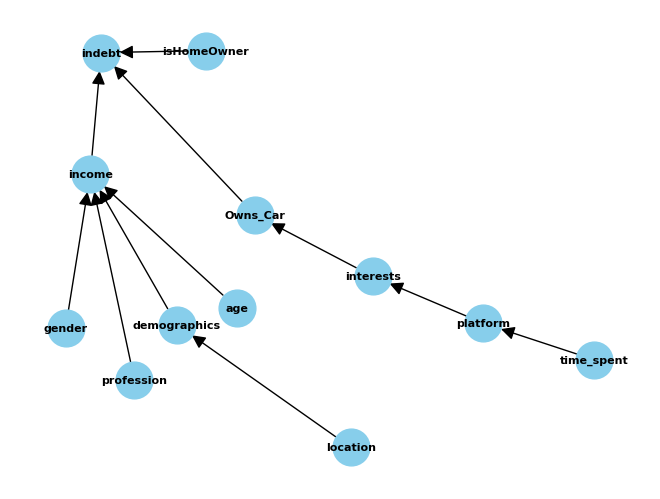

In [24]:
# Costruisci la struttura della Bayesian Network
model = BayesianNetwork([
    ('age', 'income'),  # L'età può influenzare il reddito
    ('gender', 'income'),  # Il genere può influenzare il reddito
    ('time_spent', 'platform'),  # Il tempo trascorso può influenzare la scelta della piattaforma
    ('platform', 'interests'),  # La piattaforma può influenzare gli interessi
    ('interests', 'Owns_Car'),  # Gli interessi possono influenzare il possesso di auto
    ('location', 'demographics'),  # La posizione può influenzare le caratteristiche demografiche
    ('demographics', 'income'),  # Le caratteristiche demografiche possono influenzare il reddito
    ('profession', 'income'),  # La professione può influenzare il reddito
    ('income', 'indebt'),  # Il reddito può influenzare il debito
    ('isHomeOwner', 'indebt'),  # Essere proprietario di casa può influenzare il debito
    ('Owns_Car', 'indebt')  # Possedere auto può influenzare il debito
])


# Adatta la Bayesian Network ai dati utilizzando il Maximum Likelihood Estimator
model.fit(social_data, estimator=MaximumLikelihoodEstimator)

# Estrai la struttura del grafo
edges = model.edges()

# Crea un oggetto grafo di NetworkX
G = nx.DiGraph()

# Aggiungi gli archi al grafo
G.add_edges_from(edges)

# Disegna il grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color="skyblue", font_size=8, arrowsize=20)
plt.show()

In [100]:
# Esegui una query predittiva
inference = VariableElimination(model)

# Query: Qual è la probabilità di essere in debito dato il reddito e il fatto che l'utente possiede una casa?
query_result = inference.query(variables=['Owns_Car'])

# Visualizza i risultati
print(query_result)

+-----------------+-----------------+
| Owns_Car        |   phi(Owns_Car) |
+=================+=================+
| Owns_Car(False) |          0.4610 |
+-----------------+-----------------+
| Owns_Car(True)  |          0.5390 |
+-----------------+-----------------+


In [119]:
# Query: Qual è la probabilità di essere in debito dato il reddito e il fatto che l'utente possiede una casa?
query_result = inference.query(variables=['indebt'], evidence={'platform' : 'Facebook'})

# Visualizza i risultati
print(query_result)

+---------------+---------------+
| indebt        |   phi(indebt) |
+===============+===============+
| indebt(False) |        0.5012 |
+---------------+---------------+
| indebt(True)  |        0.4988 |
+---------------+---------------+


<bound method VariableElimination.induced_graph of <pgmpy.inference.ExactInference.VariableElimination object at 0x12e11a5d0>>